# Step 1: Import the required modules

In [38]:
import pandas as pd
from MatNexus import PaperCollector, TextProcessor, VecGenerator, VecVisualizer
import plotly.io as py

# Step 2: Collect and process papers

In [7]:
# Build query
query = PaperCollector.ScopusPaperCollector.build_query(
    keywords="electrocatalyst", fixyear=2021, openaccess=True
)

# Collect papers

# Note: Usually, you should be in the same network as your institution because many
# institutions purchase the full access to use the Scopus API. However, always make sure
# to verify this.

# You can find the 'raw_collected_papers.csv' file in the same directory as this
# notebook, so you can skip this step if you don't have full access to the Scopus API.
collector = PaperCollector.ScopusPaperCollector(query, limit=100)
collector.collect_papers()

In [6]:
# Save collected papers to csv file
collector.results.to_csv("raw_collected_papers.csv")

# Step 3: Process text data

In [8]:
# Process text data
df = pd.read_csv("raw_collected_papers.csv")
processor = TextProcessor.TextProcessor(df)
final_df = processor.processed_df

In [9]:
# Save processed dataframe to csv file
final_df.to_csv("processed_file.csv")

# Step 4: Creat Word2VecModel

In [13]:
# Create corpus from the processed dataframe
final_df = pd.read_csv("processed_file.csv")
corpus = VecGenerator.Corpus(final_df)

In [ ]:
# Get all the sentences from the corpus
sentences = corpus.sentences

In [14]:
# Create Word2VecModel
model = VecGenerator.Word2VecModel(sentences)
model.fit()

# Save Word2VecModel
# Note: You can find the generated 'model' file in the same directory as this
model.save("model")

In [15]:
# Load Word2VecModel
model = VecGenerator.Word2VecModel.load("model")

In [22]:
# Find words similar to a given word
model.most_similar("pt", topn=10)

[('cofev', 0.9889982342720032),
 ('2.85', 0.9837772846221924),
 ('cop', 0.9832703471183777),
 ('trace', 0.9806351065635681),
 ('pdc', 0.9804914593696594),
 ('load', 0.9802528023719788),
 ('superior', 0.9796648025512695),
 ('zab', 0.9792957901954651),
 ('dosage', 0.9792872071266174),
 ('structure', 0.9791757464408875)]

## Case1: Find materials similar to a given material within a list of materials which created using MaterialListGenerator

In [23]:
# Using MaterialListGenerator to generate a list of materials

generator = VecGenerator.MaterialListGenerator([("W", [10, 30]), ("Ni", [70, 90])])
material_list = generator.generate_material_list()
material_list

,Material,W,Ni
0,W10Ni90,10.0,90.0
1,W11Ni89,11.0,89.0
2,W12Ni88,12.0,88.0
3,W13Ni87,13.0,87.0
4,W14Ni86,14.0,86.0
5,W15Ni85,15.0,85.0
6,W16Ni84,16.0,84.0
7,W17Ni83,17.0,83.0
8,W18Ni82,18.0,82.0
9,W19Ni81,19.0,81.0


In [29]:
# Using MaterialSimilarityCalculator to find similar materials to 'pt' within the
# material_list

# Prepare property list
property_list = ["low overpotential", "low tafel slope", "stability", "durability"]

# Create MaterialSimilarityCalculator instance
calculator = VecGenerator.MaterialSimilarityCalculator(
    model, property_list=property_list
)

# Find similar materials
calculator.find_top_similar_materials(
    "pt", material_list=material_list.Material, top_n=5
)

Top 5 similar materials:
W30Ni70: 0.9999
W29Ni71: 0.9999
W28Ni72: 0.9999
W27Ni73: 0.9999
W26Ni74: 0.9999


[('W30Ni70', 0.9999499),
 ('W29Ni71', 0.99994695),
 ('W28Ni72', 0.9999441),
 ('W27Ni73', 0.999941),
 ('W26Ni74', 0.9999379)]

## Case2: Find materials similar to a given material within a list of materials which from a given dataframe

In [65]:
# Load dataframe, you can find the 'dummy_dataset.csv' file in the same directory as this
df = pd.read_csv("dummy_dataset.csv")
calculator.calculate_similarity_from_dataframe(
    df,
    element_columns=["Ru", "Rh", "Pd", "Ir", "Pt"],
    target_material="pt",
    percentages_as_decimals=True,
    experimental_indicator_column="Resistance",
    experimental_indicator_func=lambda x: 1 / x,
    top_n=5,
)

[('Ru0.0328792476843226Rh0.2135573160948586Pd0.0852788853572071Ir0.0402080112420853Pt0.6280765396215262',
  0.9999871850013733),
 ('Ru0.0716573021309451Rh0.0949898343190479Pd0.1415092007175472Ir0.1576183896199152Pt0.5342252732125445',
  0.9999604225158691),
 ('Ru0.0260514414509284Rh0.3315417828034212Pd0.1952491707460696Ir0.0246986132522261Pt0.4224589917473546',
  0.9999584555625916),
 ('Ru0.0927646280457747Rh0.3701726730097414Pd0.0350540202121575Ir0.0829588652322003Pt0.4190498135001259',
  0.9999552369117737),
 ('Ru0.1553725213700081Rh0.1348618913057519Pd0.1845927659637309Ir0.0449224702256053Pt0.4802503511349036',
  0.9999535083770752)]

# Step 5: Visualize word embeddings

In [35]:
# Load Word2Vec model
model = VecGenerator.Word2VecModel.load("model")

# Create Word2VecVisualizer instance
visualizer = VecVisualizer.Word2VecVisualizer(model)

# Prepare property list
property_list = ["low overpotential", "low tafel slope", "stability", "durability"]

## Case1: Plot word embeddings using t-SNE

In [51]:
# Plot word embeddings using t-SNE
fig_t_SNE = visualizer.plot_data(
    property_list, plot_method="t_sne", level=0, top_n_similar=10, scale_factor=2
)

# Save figure to html file

# Note: The generated html file is in the same directory as this notebook
# You can open the html file in your browser to interact with the plot
py.write_html(fig_t_SNE, "fig_t_SNE.html")

## Case2: Visualize material vectors

In [50]:
# Visualize material vectors

fig_materials = visualizer.plot_material_vectors(
    material_list=["Ir", "Pd", "Pt", "Rh", "Ru", "Ni"], textfont_size=7, scale_factor=2
)
py.write_html(fig_materials, "fig_materials.html")

## Case3: Visualize similarity scatter plot from a given dataframe

In [61]:
# Visualize similarity scatter plot from a given dataframe

# Load dataframe
df = pd.read_csv("dummy_dataset.csv")

# Create MaterialSimilarityCalculator instance
calculator = VecGenerator.MaterialSimilarityCalculator(
    model, property_list=property_list
)

# Calculate similarity from dataframe
df = calculator.calculate_similarity_from_dataframe(
    df, element_columns=["Ru", "Rh", "Pd", "Ir", "Pt"], target_material="pt"
)
df

,ID,x,y,Ru,Rh,Pd,Ir,Pt,Resistance,Similarity,Experimental_Indicator,Material_Name
0,1,24242.424242,7777.777778,0.108828,0.277123,0.240609,0.239526,0.133914,0.983652,0.999806,1.016620,Ru0.1088276367837517Rh0.2771226716501394Pd0.24...
1,2,27777.777778,4343.434343,0.171256,0.112874,0.023274,0.356995,0.335601,1.440859,0.999893,0.694031,Ru0.1712555291903141Rh0.1128743285308549Pd0.02...
2,3,3030.303030,5252.525253,0.234371,0.233648,0.130214,0.180279,0.221488,1.413776,0.999851,0.707326,Ru0.2343707533027569Rh0.2336484914850897Pd0.13...
3,4,18181.818182,8181.818182,0.322968,0.094022,0.171261,0.049096,0.362654,1.315109,0.999907,0.760393,Ru0.3229677346856058Rh0.0940218930527095Pd0.17...
4,5,1010.101010,9191.919192,0.244149,0.092090,0.270541,0.248963,0.144257,1.275214,0.999802,0.784182,Ru0.2441487098777759Rh0.0920903693653798Pd0.27...
...,...,...,...,...,...,...,...,...,...,...,...,...
337,338,21212.121212,5656.565657,0.090471,0.277302,0.094406,0.294240,0.243581,1.387683,0.999869,0.720626,Ru0.0904709328874392Rh0.2773022166753112Pd0.09...
338,339,28787.878788,8686.868687,0.285717,0.006392,0.341768,0.257946,0.108177,1.454944,0.999778,0.687312,Ru0.2857171195828151Rh0.0063917727466011Pd0.34...
339,340,39393.939394,707.070707,0.296219,0.100546,0.311705,0.040208,0.251322,1.174589,0.999860,0.851361,Ru0.2962191435491418Rh0.1005455807936634Pd0.31...
340,341,23737.373737,1717.171717,0.397485,0.070966,0.177824,0.009119,0.344607,1.442579,0.999895,0.693203,Ru0.3974850862547722Rh0.0709656377252801Pd0.17...


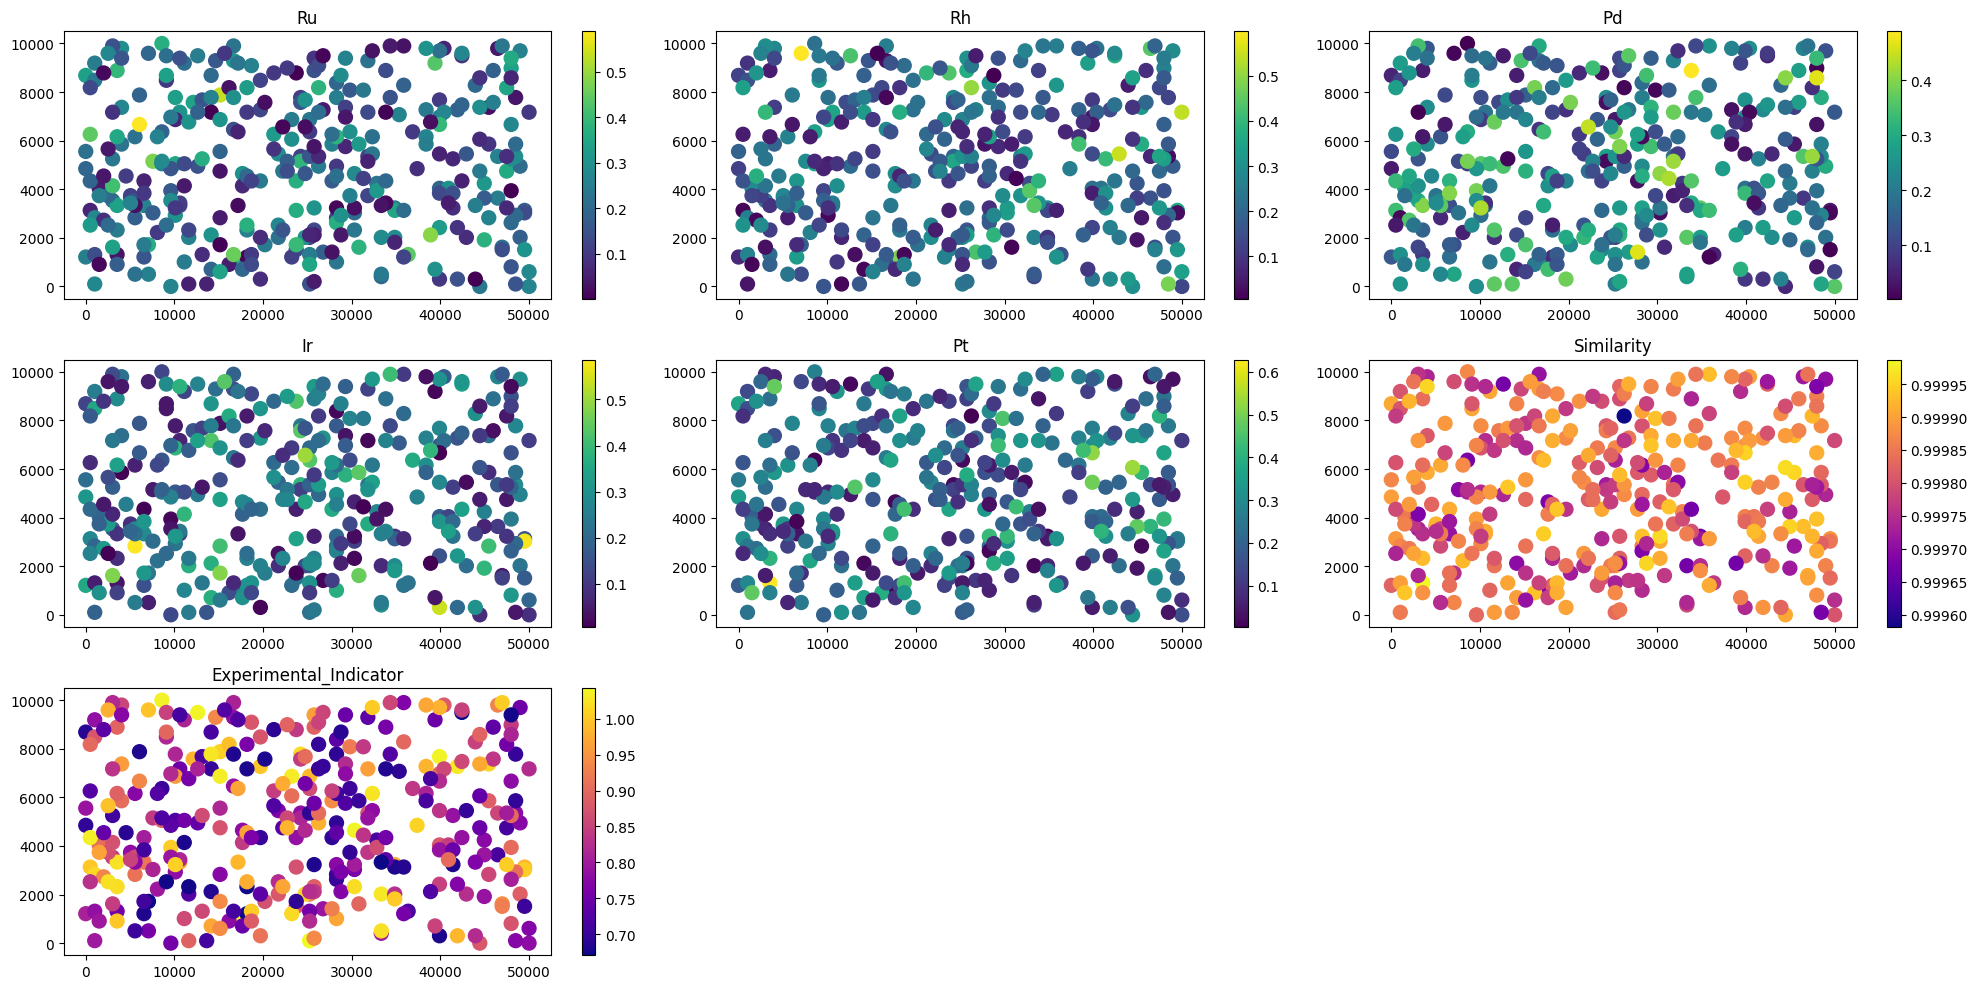

In [63]:
# Plot similarity scatter plot
plot_elements = ["Ru", "Rh", "Pd", "Ir", "Pt", "Similarity", "Experimental_Indicator"]
fig_materials_similarity = visualizer.plot_similarity_scatter(
    df, elements=plot_elements, ncols=3, nrows=3
)

# Save figure
fig_materials_similarity.savefig("fig_materials_similarity.png", dpi=300)